# Project - Image Classification

Hola !

Objective of this project is to implement the following models for the CIFAR100 image classification dataset.

### Importing packages 

In [2]:
# Import neccessary packages here
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import matplotlib.pyplot as plt
import keras
from keras.datasets import mnist
from keras.models import Sequential,model_from_json
from keras.layers import Dense
from keras.optimizers import RMSprop
import pylab as plt
import tensorflow as tf
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPooling2D
from tensorflow.keras.losses import sparse_categorical_crossentropy
from tensorflow.keras.optimizers import Adam
import matplotlib.pyplot as plt
import pickle
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pylab import rcParams
%matplotlib inline
import keras
from keras.utils import to_categorical

### Load data

In [3]:
from google.colab import drive
drive.mount("/content/drive")

Mounted at /content/drive


In [4]:
ls "/content/drive/My Drive/GlobalAI/datasets/cifar-100-python/"

file.txt~  meta  test  train


In [5]:
#function to read files present in the Python version of the dataset
def unpickle(file):
    with open(file, 'rb') as fo:
        myDict = pickle.load(fo, encoding='latin1')
    return myDict

In [6]:
tr= "/content/drive/My Drive/GlobalAI/datasets/cifar-100-python/train"
trainData = unpickle(tr)#type of items in each file
for item in trainData:
    print(item, type(trainData[item]))

filenames <class 'list'>
batch_label <class 'str'>
fine_labels <class 'list'>
coarse_labels <class 'list'>
data <class 'numpy.ndarray'>


In [7]:
print(len(trainData['data']))
print(len(trainData['data'][0]))

50000
3072


There are 100 different fine labels for the images ranging from 0 to 99.

In [8]:
print(np.unique(trainData['fine_labels']))

[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47
 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71
 72 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90 91 92 93 94 95
 96 97 98 99]


In [9]:
te="/content/drive/My Drive/GlobalAI/datasets/cifar-100-python/test"
me="/content/drive/My Drive/GlobalAI/datasets/cifar-100-python/meta"

testData = unpickle(te)
metaData = unpickle(me)#metaData
print("Fine labels:", metaData['fine_label_names'], "\n")
print("Coarse labels:", metaData['coarse_label_names'])

Fine labels: ['apple', 'aquarium_fish', 'baby', 'bear', 'beaver', 'bed', 'bee', 'beetle', 'bicycle', 'bottle', 'bowl', 'boy', 'bridge', 'bus', 'butterfly', 'camel', 'can', 'castle', 'caterpillar', 'cattle', 'chair', 'chimpanzee', 'clock', 'cloud', 'cockroach', 'couch', 'crab', 'crocodile', 'cup', 'dinosaur', 'dolphin', 'elephant', 'flatfish', 'forest', 'fox', 'girl', 'hamster', 'house', 'kangaroo', 'keyboard', 'lamp', 'lawn_mower', 'leopard', 'lion', 'lizard', 'lobster', 'man', 'maple_tree', 'motorcycle', 'mountain', 'mouse', 'mushroom', 'oak_tree', 'orange', 'orchid', 'otter', 'palm_tree', 'pear', 'pickup_truck', 'pine_tree', 'plain', 'plate', 'poppy', 'porcupine', 'possum', 'rabbit', 'raccoon', 'ray', 'road', 'rocket', 'rose', 'sea', 'seal', 'shark', 'shrew', 'skunk', 'skyscraper', 'snail', 'snake', 'spider', 'squirrel', 'streetcar', 'sunflower', 'sweet_pepper', 'table', 'tank', 'telephone', 'television', 'tiger', 'tractor', 'train', 'trout', 'tulip', 'turtle', 'wardrobe', 'whale', '

In [10]:
#storing coarse labels along with its number code in a dataframe

category = pd.DataFrame(metaData['coarse_label_names'], columns=['SuperClass'])#storing fine labels along with its number code in a dataframe
subCategory = pd.DataFrame(metaData['fine_label_names'], columns=['SubClass'])

print(category)
print(subCategory)

                        SuperClass
0                  aquatic_mammals
1                             fish
2                          flowers
3                  food_containers
4             fruit_and_vegetables
5     household_electrical_devices
6              household_furniture
7                          insects
8                 large_carnivores
9    large_man-made_outdoor_things
10    large_natural_outdoor_scenes
11  large_omnivores_and_herbivores
12                  medium_mammals
13        non-insect_invertebrates
14                          people
15                        reptiles
16                   small_mammals
17                           trees
18                      vehicles_1
19                      vehicles_2
         SubClass
0           apple
1   aquarium_fish
2            baby
3            bear
4          beaver
..            ...
95          whale
96    willow_tree
97           wolf
98          woman
99           worm

[100 rows x 1 columns]


In [11]:
X_train = trainData['data']
X_train

array([[255, 255, 255, ...,  10,  59,  79],
       [255, 253, 253, ..., 253, 253, 255],
       [250, 248, 247, ..., 194, 207, 228],
       ...,
       [248, 240, 236, ..., 180, 174, 205],
       [156, 151, 151, ..., 114, 107, 126],
       [ 31,  30,  31, ...,  72,  69,  67]], dtype=uint8)

In [12]:
#4D array input for building the CNN model using Keras
X_train = X_train.reshape(len(X_train),3,32,32).transpose(0,2,3,1)
#X_train

In [13]:
#transforming the testing dataset
X_test = testData['data']
X_test = X_test.reshape(len(X_test),3,32,32).transpose(0,2,3,1)

y_train = trainData['fine_labels']
y_test = testData['fine_labels']

In [14]:
#number of classes in the dataset
n_classes = 100

y_train = to_categorical(y_train, n_classes)
y_test = to_categorical(y_test, n_classes)

In [15]:
X_test.shape

(10000, 32, 32, 3)

In [16]:
y_test.shape

(10000, 100)

###  Training parameters

In [17]:
# Mention the training parameters such as epochs, learning rate, number of samples etc.
# Model configuration
batch_size = 50
img_width, img_height, img_num_channels = 32, 32, 3
loss_function = sparse_categorical_crossentropy
no_classes = 100
no_epochs = 100


# Shape of the data = 32,32,3
input_shape = (img_width, img_height, img_num_channels)

## Training CNN for CIFAR100

In [47]:
# Design the model architecture here
# Create the model
model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=input_shape))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(64, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(128, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dense(128, activation='relu'))
model.add(Dense(no_classes, activation='softmax'))

model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_9 (Conv2D)            (None, 30, 30, 32)        896       
_________________________________________________________________
max_pooling2d_9 (MaxPooling2 (None, 15, 15, 32)        0         
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 13, 13, 64)        18496     
_________________________________________________________________
max_pooling2d_10 (MaxPooling (None, 6, 6, 64)          0         
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 4, 4, 128)         73856     
_________________________________________________________________
max_pooling2d_11 (MaxPooling (None, 2, 2, 128)         0         
_________________________________________________________________
flatten_3 (Flatten)          (None, 512)              

### Compile

In [48]:
# Compile the model architecture here
# Compile the model
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

# Fit data to model
history = model.fit(X_train, y_train,
            batch_size=batch_size,
            epochs=no_epochs,
            verbose=1,
            validation_data=(X_test, y_test))



score, acc = model.evaluate(X_test, y_test, batch_size=batch_size)
print('Test score:', score)
print('Test accuracy:', acc)

Epoch 1/100
1000/1000 [==============================] - 64s 64ms/step - loss: 4.4995 - accuracy: 0.0653 - val_loss: 3.4586 - val_accuracy: 0.1793
Epoch 2/100
1000/1000 [==============================] - 64s 64ms/step - loss: 3.3561 - accuracy: 0.1912 - val_loss: 3.1495 - val_accuracy: 0.2288
Epoch 3/100
1000/1000 [==============================] - 64s 64ms/step - loss: 3.0191 - accuracy: 0.2535 - val_loss: 3.0886 - val_accuracy: 0.2507
Epoch 4/100
1000/1000 [==============================] - 64s 64ms/step - loss: 2.7963 - accuracy: 0.2960 - val_loss: 2.9250 - val_accuracy: 0.2834
Epoch 5/100
1000/1000 [==============================] - 65s 65ms/step - loss: 2.6312 - accuracy: 0.3329 - val_loss: 2.8783 - val_accuracy: 0.2999
Epoch 6/100
1000/1000 [==============================] - 65s 65ms/step - loss: 2.4708 - accuracy: 0.3672 - val_loss: 2.8692 - val_accuracy: 0.3060
Epoch 7/100
1000/1000 [==============================] - 65s 65ms/step - loss: 2.3378 - accuracy: 0.3932 - val_loss: 2

### Training

In [18]:
# Train the transfer learning model here
from keras.applications import ResNet101
import keras
import tensorflow as tf
from keras.models import Model,Sequential, Input, load_model
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D, BatchNormalization, AveragePooling2D, GlobalAveragePooling2D



def get_model_resnet101():
    densenet = ResNet101(weights='imagenet', include_top=False, input_shape=(32, 32, 3))

    input = Input(shape=(32, 32, 3))
    x = Conv2D(3, (3, 3), padding='same')(input)
    
    x = densenet(x)
    
    x = GlobalAveragePooling2D()(x)
    x = BatchNormalization(momentum=0.9)(x)
    x = Dropout(0.5)(x)
    x = Dense(256, activation='relu')(x)
    x = BatchNormalization(momentum=0.9)(x)
    x = Dropout(0.5)(x)
    
  
  
    # multi output
    output = Dense(100,activation = 'softmax', name='root')(x)
 

    # model
    model = Model(input,output)
    
    
    optimizer = tf.keras.optimizers.SGD( learning_rate=0.001,decay=1e-6 ,momentum=0.0, nesterov=False, name="SGD") 
    
    model.compile(loss='categorical_crossentropy', optimizer=optimizer, metrics=['accuracy'])
    model.summary()
    
    return model


In [19]:
model=get_model_resnet101()

171450368/171446536 [==============================] - 2s 0us/step
Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 32, 32, 3)]       0         
_________________________________________________________________
conv2d (Conv2D)              (None, 32, 32, 3)         84        
_________________________________________________________________
resnet101 (Functional)       (None, 1, 1, 2048)        42658176  
_________________________________________________________________
global_average_pooling2d (Gl (None, 2048)              0         
_________________________________________________________________
batch_normalization (BatchNo (None, 2048)              8192      
_________________________________________________________________
dropout (Dropout)            (None, 2048)              0         
____________________________________________________________

In [20]:
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

# Fit data to model
hist = model.fit(X_train, y_train,
            batch_size=batch_size,
            epochs=50,
            verbose=1,
            validation_data=(X_test, y_test))



score, acc = model.evaluate(X_test, y_test, batch_size=batch_size)
print('Test score:', score)
print('Test accuracy:', acc)

Epoch 1/50
1000/1000 [==============================] - 129s 87ms/step - loss: 5.1530 - accuracy: 0.0110 - val_loss: 38.1680 - val_accuracy: 0.0169
Epoch 2/50
1000/1000 [==============================] - 85s 85ms/step - loss: 4.8389 - accuracy: 0.0124 - val_loss: 5.8944 - val_accuracy: 0.0120
Epoch 3/50
1000/1000 [==============================] - 86s 86ms/step - loss: 4.7268 - accuracy: 0.0134 - val_loss: 4.5716 - val_accuracy: 0.0179
Epoch 4/50
1000/1000 [==============================] - 86s 86ms/step - loss: 4.5882 - accuracy: 0.0188 - val_loss: 5.1415 - val_accuracy: 0.0399
Epoch 5/50
1000/1000 [==============================] - 85s 85ms/step - loss: 4.3960 - accuracy: 0.0303 - val_loss: 4.2312 - val_accuracy: 0.0337
Epoch 6/50
1000/1000 [==============================] - 86s 86ms/step - loss: 4.2827 - accuracy: 0.0399 - val_loss: 5.3365 - val_accuracy: 0.0136
Epoch 7/50
1000/1000 [==============================] - 86s 86ms/step - loss: 4.1705 - accuracy: 0.0450 - val_loss: 4.0963

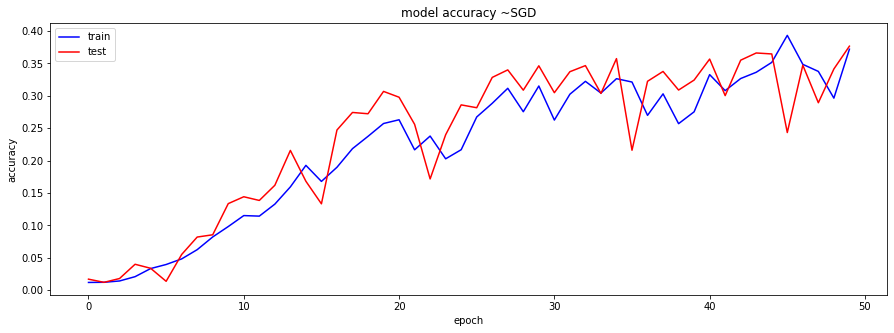

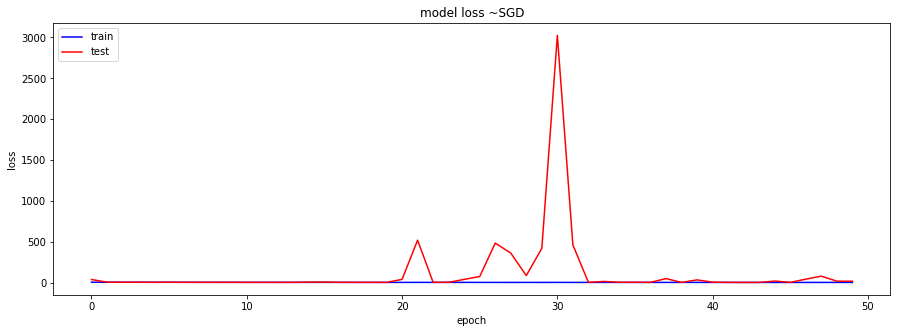

In [21]:

plt.figure(figsize=(15,5))
plt.plot(hist.history['accuracy'],color="blue")
plt.plot(hist.history['val_accuracy'],color="red")
plt.title('model accuracy ~SGD')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')

plt.figure(figsize=(15,5))
plt.plot(hist.history['loss'],color="blue")
plt.plot(hist.history['val_loss'],color="red")
plt.title('model loss ~SGD')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')


If we train the model with more epochs, we can get a better result. 

### Save

In [22]:
!pip install pyyaml h5py  # Required to save models in HDF5 format

In [26]:
# Save the model to disk
model_wei=model.save_weights("/content/drive/My Drive/GlobalAI/modelCifar.h5")


### Recreate the exact same model

### Further Fun



*   Experiment with different model architectures
*   Play with different parameters such as convolution size, pooling, padding, striding, epochs, dropout etc.
*   Train a Dense Neural Network as baseline and compare the performance

